# Macro-Etymological Analysis

This is a method for analyzing the language histories of the words in a text. There's not a lot written about it, but I write about it (and show an example analysis) [here in this chapter of _Reading Modernism with Machines_](https://link.springer.com/chapter/10.1057/978-1-137-59569-0_9). (The link is unfortunately behind a paywall, but you can find a preprint of it [here on my blog](https://jonreeve.com/2015/05/macroetymology-of-portrait-paper/).) 

In short: it finds the etymologies for each word in a text, like this one from Wiktionary for "more":  

From Middle English more, from Old English māra (“more”), from Proto-Germanic *maizô (“more”), from Proto-Indo-European *mē- (“many”).

Ordinarily `macroetym` is a command-line program, but since it's written in Python, we can use it as a module without much effort. First we should get a copy of the software right from the source, since I haven't gotten around to fixing the version on PyPi yet: 

In [ ]:
!git clone https://github.com/JonathanReeve/macro-etym.git

Cloning into 'macro-etym'...
remote: Enumerating objects: 387, done.
remote: Total 387 (delta 0), reused 0 (delta 0), pack-reused 387
Receiving objects: 100% (387/387), 11.83 MiB | 13.89 MiB/s, done.
Resolving deltas: 100% (209/209), done.


In [ ]:
!pip install ./macro-etym

Processing ./macro-etym
     |████████████████████████████████| 10.0MB 2.7MB/s 
  Created wheel for macroetym: filename=macroetym-0.1.2-cp36-none-any.whl size=11334097 sha256=04951e50b15b48308c4637385e381bed22d157df8efe87903cc8a027b0876875
  Stored in directory: /root/.cache/pip/wheels/86/a5/0a/97de412c84e9359fe6f203a1fd178df91ce299a0297c534d4f
  Created wheel for pycountry: filename=pycountry-19.7.15-py2.py3-none-any.whl size=10627300 sha256=17067a6f7fa2f3eab707e5eed284be15fcdec1e05f4e031726fe20065b84f511
  Stored in directory: /root/.cache/pip/wheels/d8/ec/a8/fccfbe963e033bb1c4413b238a32be8c821f5a16595ec00d2a
Successfully built macroetym pycountry


In [ ]:
import macroetym
from macroetym.main import Text
import requests
import json
import nltk
import pandas as pd

In [ ]:
nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

In [ ]:
gardenParty = requests.get('https://raw.githubusercontent.com/JonathanReeve/course-computational-literary-analysis/master/Texts/garden-party.md').text
gardenParts = gardenParty.split('\n# ')
[part[:20] for part in gardenParts]

['# 1. AT THE BAY.\n## ',
 '2. THE GARDEN PARTY.',
 '3. THE DAUGHTERS OF ',
 '4. MR. AND MRS. DOVE',
 '5. THE YOUNG GIRL.\n\n',
 '6. LIFE OF MA PARKER',
 '7. MARRIAGE A LA MOD',
 '8. THE VOYAGE.\n\nThe ',
 '9. MISS BRILL.\n\nAlth',
 '10. HER FIRST BALL.\n',
 '11. THE SINGING LESS',
 '12. THE STRANGER\n\nIt',
 '13. BANK HOLIDAY.\n\nA',
 '14. AN IDEAL FAMILY.',
 "15. The Lady's Maid\n"]

In [ ]:
gpText = Text(gardenParts[1])

In [ ]:
gpText.familyStats()

{'Austronesian': 0.0,
 'Balto-Slavic': 0.0,
 'Celtic': 0.0,
 'Germanic': 59.516954574536136,
 'Hellenic': 0.5758157389635316,
 'Indo-Iranian': 0.0639795265515035,
 'Japonic': 0.19193857965451053,
 'Latinate': 38.787587971849014,
 'Other': 0.19193857965451053,
 'Semitic': 0.4798464491362763,
 'Turkic': 0.19193857965451053,
 'Uralic': 0.0}

In [ ]:
moonstoneUrl = 'https://raw.githubusercontent.com/JonathanReeve/course-computational-literary-analysis/gh-pages/_texts/moonstone.md'
moonstoneText = requests.get(moonstoneUrl).text
moonstoneParts = moonstoneText.split('\n## ')

In [ ]:
[(i, part[:50]) for i, part in enumerate(moonstoneParts)]

[(0, '---\nlayout: narrative\ntitle: "The Moonstone"\nautho'),
 (1, 'Prologue\n\nThe Storming of Seringapatam (1799)\n\nExt'),
 (2, 'Second Period\n\nTHE DISCOVERY OF THE TRUTH (1848-18'),
 (3, 'First Narrative\n\nContributed by MISS CLACK; niece '),
 (4, 'Second Narrative\n\nContributed by MATHEW BRUFF, Sol'),
 (5, 'Third Narrative\n\nContributed by FRANKLIN BLAKE\n\n##'),
 (6, 'Fourth Narrative\n\nExtracted from the Journal of EZ'),
 (7, 'Fifth Narrative\n\nThe Story Resumed by FRANKLIN BLA'),
 (8, 'Sixth Narrative\n\nContributed by SERGEANT CUFF\n\n###'),
 (9, 'Seventh Narrative\n\nIn a Letter from MR. CANDY\n\nFri'),
 (10, 'Eighth Narrative\n\nContributed by GABRIEL BETTEREDG'),
 (11, 'Epilogue\n\nTHE FINDING OF THE DIAMOND\n\n### Chapter ')]

In [ ]:
moonstoneObjs = [Text(part) for part in moonstoneParts]

In [ ]:
moonstoneEtym = [t.familyStats() for t in moonstoneObjs]

In [ ]:
moonstoneLengths = [len(part) for part in moonstoneParts]

In [ ]:
labels = ['??', 'Prologue', 'Betteredge', 'Clack', 'Bruff', 'Blake', 'Jennings', 'Blake2', 'Cuff', 'Candy', 'Betteredge2', 'Epilogue']
df = pd.DataFrame(moonstoneEtym, index=labels)

In [ ]:
df

,Austronesian,Balto-Slavic,Celtic,Germanic,Hellenic,Indo-Iranian,Japonic,Latinate,Other,Semitic,Turkic,Uralic
??,0.000000,0.000000,0.000000,22.222222,0.000000,0.000000,0.0,77.777778,NaN,0.000000,0.000000,0.000000
Prologue,0.025349,0.038023,0.019011,39.673004,0.380228,0.069708,0.0,59.243346,0.171103,0.304183,0.076046,0.000000
Betteredge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,100.000000,NaN,0.000000,0.000000,0.000000
Clack,0.036350,0.000000,0.000000,36.018720,0.517993,0.072701,0.0,62.763541,0.190840,0.290803,0.109051,0.000000
Bruff,0.035804,0.000000,0.000000,35.775152,0.358038,0.035804,0.0,63.258145,0.107411,0.322234,0.107411,0.000000
Blake,0.032906,0.000000,0.049358,38.840079,0.394867,0.016453,0.0,60.246792,0.123396,0.197433,0.098717,0.000000
Jennings,0.029682,0.000000,0.044524,41.257050,0.712378,0.207777,0.0,57.080736,0.089047,0.400712,0.089047,0.089047
Blake2,0.052247,0.000000,0.000000,46.238245,0.365726,0.208986,0.0,52.455590,NaN,0.522466,0.156740,0.000000
Cuff,0.000000,0.000000,0.000000,38.620072,0.238949,0.059737,0.0,60.394265,NaN,0.507766,0.179211,0.000000
Candy,0.000000,0.000000,0.000000,64.294404,0.729927,0.000000,0.0,34.610706,NaN,0.364964,0.000000,0.000000


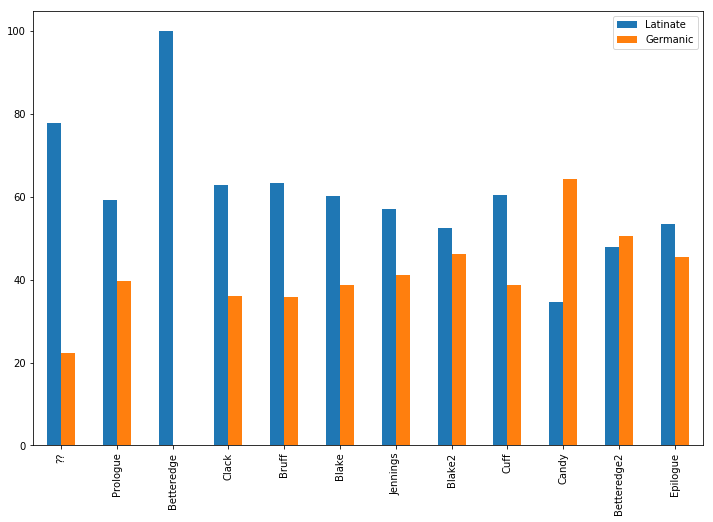

In [ ]:
df[['Latinate', 'Germanic']].plot(kind='bar', figsize=(12,8))